# Credit Risk Modelling - Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv("./data/cr_loan.csv")
loan_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
loan_data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [4]:
pd.crosstab(loan_data['loan_intent'],loan_data['loan_status'],margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


## Checking for Outliers

In [5]:
pd.crosstab(loan_data['loan_intent'],loan_data['loan_status'],values = loan_data['loan_int_rate'],aggfunc = 'mean').round(2)

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,10.01,13.40
EDUCATION,10.63,12.50
HOMEIMPROVEMENT,10.60,12.90
MEDICAL,10.19,13.40
PERSONAL,10.59,12.61
VENTURE,10.54,13.32


In [6]:
pd.crosstab(loan_data['person_home_ownership'],loan_data['loan_status'],values = loan_data['person_emp_length'], aggfunc = 'max')

loan_status,0,1
person_home_ownership,,
MORTGAGE,123.0,34.0
OTHER,24.0,11.0
OWN,31.0,17.0
RENT,41.0,123.0


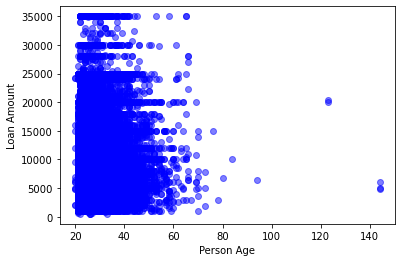

In [7]:
plt.scatter(loan_data['person_age'],loan_data['loan_amnt'], c = 'blue', alpha = 0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [8]:
null_columns = loan_data.columns[loan_data.isnull().any()]
loan_data[null_columns].isnull().sum()

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [9]:
loan_data.columns[loan_data.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [10]:
loan_data[loan_data['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


# Impute missing data

In [11]:
# Impute null values with median values 
loan_data['person_emp_length'].fillna((loan_data['person_emp_length'].median()), inplace = True)

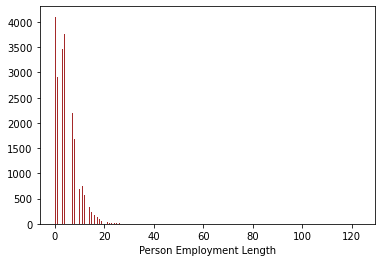

In [12]:
n, bins, patches = plt.hist(loan_data['person_emp_length'], bins = 'auto', color = 'brown')
plt.xlabel("Person Employment Length")
plt.show()

In [13]:

loan_data['loan_int_rate'].isnull().sum()

3116

In [14]:
indices = loan_data[loan_data['loan_int_rate'].isnull()].index
clean_loan_data = loan_data.drop(indices)

In [15]:
loan_data['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [16]:
# Export data as csv 
clean_loan_data.to_csv('./data/clean_loan_data.csv')